In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf

In [2]:
os.getcwd()
os.chdir(r'C:\Users\bejao\OneDrive - Ynov\data\dogs-vs-cats\cats_and_dogs_filtered')
os.getcwd()

'C:\\Users\\bejao\\OneDrive - Ynov\\data\\dogs-vs-cats\\cats_and_dogs_filtered'

In [3]:
os.listdir()
os.listdir('train')
os.listdir('train/cats')
os.listdir('train/dogs')
imread('train/cats/cat.0.jpg')

array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [151, 120,  53],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

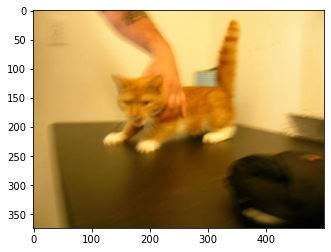

In [16]:
# Retourner ds 1 tableau numpy les pixels de l'image
# cat1 = imread('train/cats/cat.1.jpg')
# cat1
# cat1.shape  #  shape  => les dimensions
plt.imshow(cat0)

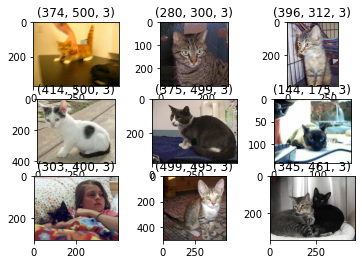

In [20]:
# Une boucle pr afficher plusieurs images dans une figure

for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = 'train/' + 'cats/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)

# S : On constate que les images sont en mode paysage, mode portrait et de différentes tailles  
# => Ceci peut poser des Pb pour la perfermonce du classifieur. Il nous faut un classifieur robuste !

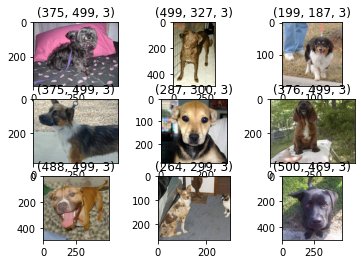

In [21]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = 'train/' + 'dogs/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)

In [7]:
# Manip avec PIL : pkg Python de réf pr le traitement d'image
# dog1 = Image.open('train/dogs/dog.1.jpg')
# dog1
# dog1.show()
# dog1.size
# dog1.mode
# dog1.format
# np.array(dog1)
# imread('train/dogs/dog.1.jpg')

dog1 = tf.keras.preprocessing.image.load_img('train/dogs/dog.1.jpg')
# dog1_ = tf.keras.preprocessing.image.img_to_array(dog1)
# dog1_

array([[[235, 225, 213],
        [167, 153, 140],
        [136, 118,  98],
        ...,
        [131, 103,  82],
        [126,  98,  77],
        [125,  97,  76]],

       [[248, 234, 221],
        [172, 155, 139],
        [131, 109,  88],
        ...,
        [115,  84,  64],
        [111,  80,  60],
        [110,  79,  59]],

       [[247, 230, 212],
        [169, 148, 127],
        [129, 101,  77],
        ...,
        [ 85,  54,  33],
        [ 83,  52,  31],
        [ 84,  53,  32]],

       ...,

       [[255, 255, 244],
        [254, 255, 241],
        [250, 251, 237],
        ...,
        [239, 240, 226],
        [238, 239, 225],
        [238, 239, 225]],

       [[255, 255, 244],
        [255, 255, 242],
        [252, 253, 239],
        ...,
        [245, 246, 232],
        [244, 245, 231],
        [244, 245, 231]],

       [[255, 255, 244],
        [255, 255, 243],
        [254, 255, 241],
        ...,
        [250, 251, 237],
        [248, 249, 235],
        [249, 250, 236]]

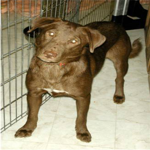

In [79]:
dog1.resize((150, 150))

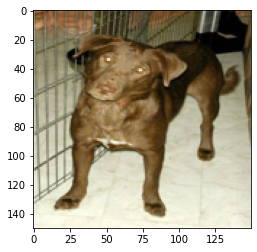

In [95]:
# dog1sz = dog1.resize((150, 150))
# dog1sz_ = tf.keras.preprocessing.image.img_to_array(dog1sz)
# dog1sz_sc = dog1sz_ * 1./255
# dog1sz_sc
plt.imshow(dog1sz)

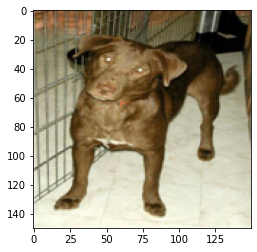

In [96]:
plt.imshow(dog1sz_sc)

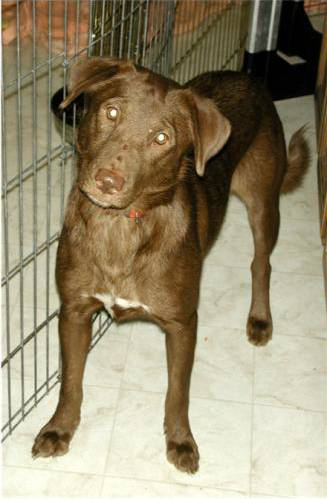

In [53]:
# dog1
# dog1.size

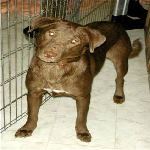

In [54]:
tf.keras.preprocessing.image.load_img('train/dogs/dog.1.jpg', target_size=(150, 150))

In [34]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [35]:
train_gen = train_datagen.flow_from_directory(
    'train', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [36]:
val_gen = val_datagen.flow_from_directory(
    'validation', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [60]:
type(val_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [69]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [76]:
# Visualiser les images resizés et rescalés
imgs, labels = next(val_gen)

In [64]:
# Ns avons réccupérer un batch de 20 images
# len(imgs) 
imgs

array([[[[0.91372555, 0.11764707, 0.05882353],
         [0.882353  , 0.08627451, 0.02745098],
         [0.882353  , 0.09803922, 0.03529412],
         ...,
         [0.31764707, 0.13725491, 0.00784314],
         [0.31764707, 0.14901961, 0.08235294],
         [0.34901962, 0.1764706 , 0.02352941]],

        [[0.9176471 , 0.10980393, 0.05490196],
         [0.9176471 , 0.10980393, 0.05490196],
         [0.8980393 , 0.10980393, 0.04705883],
         ...,
         [0.37647063, 0.1764706 , 0.        ],
         [0.35686275, 0.15294118, 0.00784314],
         [0.27450982, 0.12156864, 0.        ]],

        [[0.9568628 , 0.13333334, 0.08235294],
         [0.92549026, 0.10196079, 0.0509804 ],
         [0.91372555, 0.10588236, 0.0509804 ],
         ...,
         [0.34117648, 0.19607845, 0.03137255],
         [0.30980393, 0.13725491, 0.        ],
         [0.2509804 , 0.10980393, 0.02352941]],

        ...,

        [[0.40784317, 0.13725491, 0.10980393],
         [0.4666667 , 0.04705883, 0.02352941]

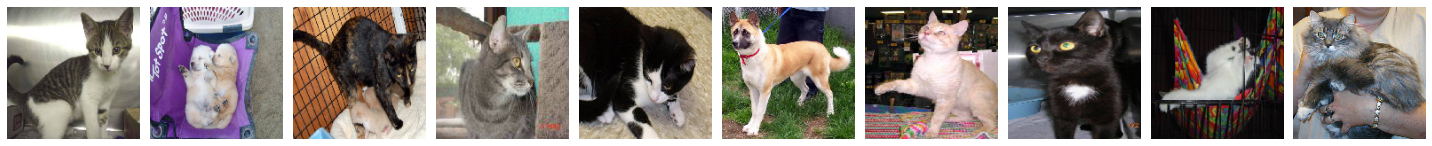

In [77]:
plotImages(imgs)

In [97]:
print(labels)

[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


# Construction du CNN

In [ ]:
# Ds le cadre du df data2 : x1, x2 comme features
inputs = tf.keras.layers.Input(shape=(2, ))

In [31]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(150, 150, 3))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0     

In [32]:
model.compile(loss='binary_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [37]:
history = model.fit_generator(train_gen, epochs=15, steps_per_epoch=100, 
                   validation_data=val_gen, validation_steps=50)

C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 76s 748ms/step - loss: 1.5670 - acc: 0.4991 - val_loss: 0.6420 - val_acc: 0.5840
Epoch 2/15
100/100 [==============================] - 50s 501ms/step - loss: 0.6524 - acc: 0.6380 - val_loss: 0.5940 - val_acc: 0.6960
Epoch 3/15
100/100 [==============================] - 49s 489ms/step - loss: 0.5583 - acc: 0.7238 - val_loss: 0.5925 - val_acc: 0.7010
Epoch 4/15
100/100 [==============================] - 53s 533ms/step - loss: 0.4928 - acc: 0.7607 - val_loss: 0.6002 - val_acc: 0.6940
Epoch 5/15
100/100 [==============================] - 57s 573ms/step - loss: 0.3946 - acc: 0.8239 - val_loss: 0.6269 - val_acc: 0.7180
Epoch 6/15
100/100 [==============================] - 65s 653ms/step - loss: 0.3507 - acc: 0.8406 - val_loss: 0.8360 - val_acc: 0.6430
Epoch 7/15
100/100 [==============================] - 58s 580ms/step - loss: 0.2546 - acc: 0.8935 - val_loss: 0.7912 - val_acc: 0.7000
Epoch 8/15
100/100 [==============================] - 5

Text(0.5, 1.0, 'Training and validation loss')

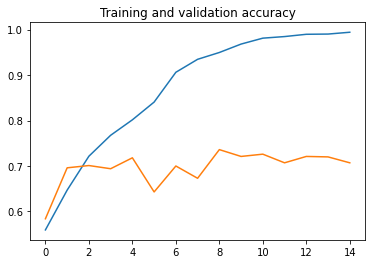

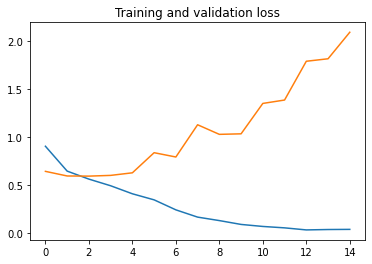

In [40]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Lutter contre le surapprentissage
### Data Augmentation  

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen

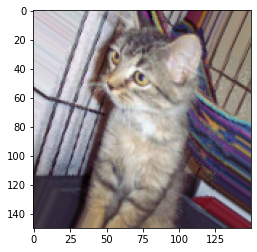

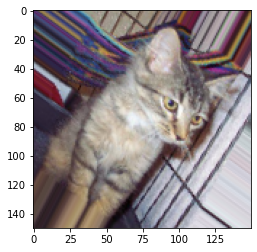

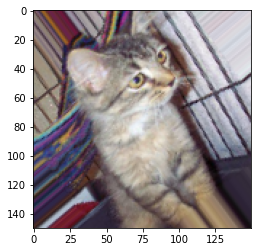

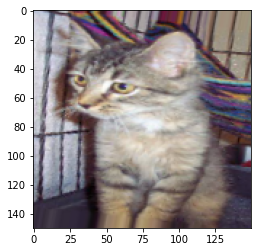

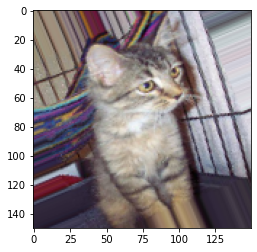

In [48]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img('train/cats/cat.2.jpg', target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [12]:
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [15]:
cnn.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [17]:
cnn.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
____________________________________________________

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [21]:
cnn.add(tf.keras.layers.Dense(512, activation='relu'))

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [25]:
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [24]:
(18496 * 512) + 512

9470464

In [26]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [27]:
cnn.get_weights()

[array([[[[ 0.06637421,  0.0227091 , -0.08536314, -0.05542003,
            0.1006794 ,  0.02940197, -0.15623312,  0.11193386,
           -0.106571  ,  0.04732251,  0.010326  , -0.11173382,
           -0.00389081,  0.04258312, -0.0433289 , -0.08461942],
          [ 0.06817016, -0.1277837 ,  0.17217863,  0.12066397,
            0.05008195, -0.02822863, -0.17130664, -0.06508255,
           -0.13736364,  0.06917691,  0.16933224,  0.12330171,
            0.09802896, -0.13210472, -0.03844811,  0.07660511],
          [-0.06400906,  0.05409421, -0.04026566,  0.04103932,
           -0.09202836, -0.07988757, -0.17898037,  0.01212409,
            0.10423961,  0.089847  ,  0.05952561,  0.13298568,
           -0.00340532,  0.11747935, -0.00915207, -0.14206094]],
 
         [[-0.08992895, -0.09844902,  0.15172762, -0.12580353,
            0.01501881,  0.14890194,  0.01552507,  0.10249802,
            0.03467564,  0.12240821,  0.04100381,  0.06299412,
            0.08957905,  0.04758176,  0.11427036,